# Tarea Examen 1
## Regina Apodaca
1. Si se tiene un oscilador armónico cuya fuerza se define como: $ \vec{F}=-k\vec{r}$. Además, tenemos que la fricción se comporta como: $\vec{f_{fricc}}=-\gamma \vec{v}$ si $|\vec{v}|<1$ pero cuando $|\vec{v}|>1$ entonces la friccion se comporta como $\vec{f_{fricc}}=-\mu v^{3/2}\hat{v}$.
    Para este problema tomamos que $\mu=0.2$ , $\gamma=0.1$ y m=1

## a)
Ecuación de Movimiento en coordenadas cartesianas:

In [341]:
from pylab import *
%matplotlib inline

In [182]:
def e_movC(r_v,t,fric=0,k=1.,m=1.):
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dx= r_v[2]
    dy=r_v[3]
    if fric==0:
        dvx=-(k/m)*r_v[0]
        dvy = -(k/m)*r_v[1]
        
    else:
        dvx = -(k/m)*r_v[0]-(1/m)*fric([r_v[2],r_v[3]])[0]
        dvy = -(k/m)*r_v[1] -(1/m)*fric([r_v[2],r_v[3]])[1]
    return array([dx,dy,dvx,dvy])

In [46]:
def fric_v(v,gamma=0.1):
    f_x=gamma*v[0]
    f_y=gamma*v[1]
    return array([f_x,f_y])
def fric_v2(v,u=0.2):
    norm_v=sqrt(v[0]**2 +v[1]**2)
    f_x=u*norm_v*(v[0])
    f_y=u*norm_v*(v[1])
    return array([f_x,f_y])

Ecuación de Movimiento en coordenadas polares:

In [186]:
def e_movP(r_v,t,fric=0,k=1.,m=1.):
    dr= r_v[2]
    do=r_v[3]
    if fric==0:
        dvr,dvo = -((k*r_v[0])/m)+m*r_v[0]*(r_v[3]**2),-m*2*r_v[2]*r_v[3]/r_v[0]
        
    else:
        dvr = -((k*r_v[0])/m)-(1/m)*fric([r_v[0],r_v[1],r_v[2],r_v[3]])[0]+r_v[0]*(r_v[3]**2)
        dvo = -(1/(m*r_v[0]))*fric([r_v[0],r_v[1],r_v[2],r_v[3]])[1]-2*r_v[2]*r_v[3]/r_v[0]
    return array([dr,do,dvr,dvo])

In [184]:
def fric_vP(r_v,gamma=0.1):
    f_r=gamma*r_v[2]
    f_o=gamma*r_v[3]*r_v[0]
    return array([f_r,f_o])
def fric_v2P(r_v,u=0.2):
    norm_v=sqrt(r_v[2]**2 +(r_v[0]*r_v[3])**2)
    f_r=u*norm_v*(r_v[2])
    f_o=u*norm_v*((r_v[3])*r_v[0])
    return array([f_r,f_o])

## b)
Lo resolvemos en coordenadas cartecianas tomando la posición inicial como: $\vec{r_0}=(0,1)$ y la velocidad inicial: $\vec{v_o}=(\cos{\theta},\sin{\theta})$

In [342]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [147]:
def e_movC1(r_v,t,k=1.,m=1.):
    return e_movC(r_v,t,fric_v)
def e_movC2(r_v,t,k=1.,m=1.):
    return e_movC(r_v,t,fric_v2)

In [107]:
def oscilador(inicio):
    u=(inicio[3]**2 + inicio[2]**2)**(0.5)
    mi_dt = 100
    if  u< 1:
        
        t,sol_dt = rk4(e_movC1,inicio,[0,mi_dt])
    else:
        
        t,sol_dt = rk4(e_movC2,inicio,[0,mi_dt])

    return t , sol_dt


Ahora graficamos la posicion en y(t) vs x(t)

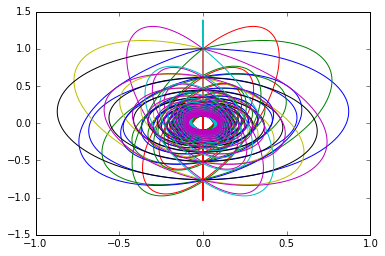

In [105]:
for i in range(12):
    d=(i*pi)/6.
    t,osc=oscilador([0,1,cos(d),sin(d)])
    plot(osc[:,0],osc[:,1])
show()

## c)
Sabemos que la energia de un oscilador armonico amortiguado se puede escribir como:
$$
E=\frac{1}{2}mv^2+\frac{1}{2}kr^2
$$

In [158]:
def Energia(r_v,k=1.,m=1.):
    x,y,dx,dy=r_v[:,0],r_v[:,1],r_v[:,2],r_v[:,3]
    E=0.5*m*(dx**2 +dy**2)+0.5*k*(x**2+y**2)
    return E

Graficamos ahora energia contra tiempo:

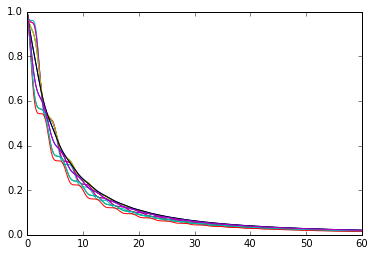

In [161]:
for i in range(12):
    d=(i*pi)/6.
    inicio=[0,1,cos(d),sin(d)]
    mi_dt=60
    u=(inicio[3]**2 + inicio[2]**2)**(0.5)
    if  u< 1:
        
        t,sol_dt = rk4(e_movC1,inicio,[0,mi_dt])
    else:
        
        t,sol_dt = rk4(e_movC2,inicio,[0,mi_dt])
        E=Energia(sol_dt)
    plot(t,E)
show()

Ahora le metemos la condicion propuesta por el problema de que $E<1\%E_0$

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

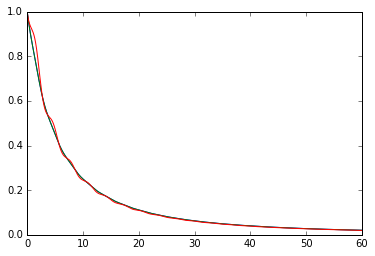

In [160]:
for i in range(12):
    d=(i*pi)/6.
    inicio=[0,1,cos(d),sin(d)]
    mi_dt=60
    u=(inicio[3]**2 + inicio[2]**2)**(0.5)
    if  u< 1:
        
        t,sol_dt = rk4(e_movC1,inicio,[0,mi_dt])
    else:
        
        t,sol_dt = rk4(e_movC2,inicio,[0,mi_dt])
        E=Energia(sol_dt)
    plot(t,E)
    if d==0:
        E0=abs(E)
        plot(t,E)
    elif d!=0 and abs(E)<(E0/100):
        plot(t,E)
    else:
        break
show()

## d)
Ahora buscamos graficar el momento angular:
$$
\vec{L}=\vec{r} \times \vec{p}
$$

In [156]:
def Momento(r_v,k=1.,m=1.):
    x,y,dx,dy=r_v[:,0],r_v[:,1],r_v[:,2],r_v[:,3]
    L=x*dy*m-y*m*dx
    return L

Graficamos ahora al momento contra el tiempo:

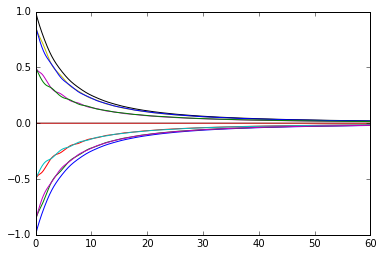

In [157]:
for i in range(12):
    d=(i*pi)/6.
    inicio=[0,1,cos(d),sin(d)]
    mi_dt=60
    u=(inicio[3]**2 + inicio[2]**2)**(0.5)
    if  u< 1:
        
        t,sol_dt = rk4(e_movC1,inicio,[0,mi_dt])
    else:
        
        t,sol_dt = rk4(e_movC2,inicio,[0,mi_dt])
        L=Momento(sol_dt)
    plot(t,L)
show()

## e)
Ahora encontraremos los espacios fase para (px,x) si proponemos como condiciones iniciales:
$$
\vec{r}=(0,1)
\vec{v}=(1,0)
$$

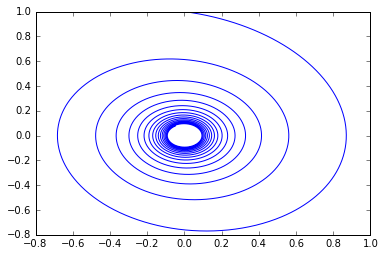

In [162]:
t,osc=oscilador([0,1,1,0])
plot(osc[:,0],osc[:,2])
show()

Mientras que en polares, tenemos un espacio fase para (pr,r) con las condiciones iniciales:
$$
\vec{r}=(1,0)
\vec{v}=(0,-1)
$$


In [165]:
def e_movP1(r_v,t,k=1.,m=1.):
    return e_movP(r_v,t,fric_vP)
def e_movP2(r_v,t,k=1.,m=1.):
    return e_movP(r_v,t,fric_v2P)

In [176]:
def osciladorP(inicio):
    u=(inicio[2]**2 + (inicio[0]*inicio[3])**2)**(0.5)
    mi_dt = 100
    if  u< 1:
        
        t,sol_dt = rk4(e_movP1,inicio,[0,mi_dt])
    else:
        
        t,sol_dt = rk4(e_movP2,inicio,[0,mi_dt])

    return t , sol_dt

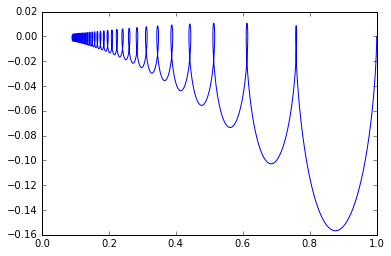

In [187]:
t,oscp=osciladorP([1.,0.,0.,-1.])
plot(oscp[:,0],oscp[:,2])
show()

## 2. a)
Buscamos resolver el caso anterior pero tomando a cargas opuestas, una en el origen y otra tal que buscamos una orbita cerrada.

Ahora, aprovechando el codigo anterior le hacemos unos cambios tales que le pueda meter el argumento de la carga.

In [313]:
def q_movP(r_v,t,fric=0,k=1.,m=1.,q=1.):
    #e=8.85*10**(-12)
    e=1/(4*pi)
    dr= r_v[2]
    do=r_v[3]
    if fric==0:
        dvr,dvo = -((k*r_v[0])/m)+m*r_v[0]*(r_v[3]**2)+(4*pi*e)*(q**2)/(m*r_v[0]**2),-2*r_v[2]*r_v[3]/r_v[0]
        
    else:
        dvr = -((k*r_v[0])/m)-(1/m)*fric([r_v[0],r_v[1],r_v[2],r_v[3]])[0]+r_v[0]*(r_v[3]**2)+(4*pi*e)*(q**2)/(m*r_v[0]**2)
        dvo = -(1/(m*r_v[0]))*fric([r_v[0],r_v[1],r_v[2],r_v[3]])[1]-2*r_v[2]*r_v[3]/r_v[0]
    return array([dr,do,dvr,dvo])

In [294]:
def fric_vP(r_v,gamma=0.1):
    f_r=gamma*r_v[2]
    f_o=gamma*r_v[3]*r_v[0]
    return array([f_r,f_o])
def fric_v2P(r_v,u=0.2):
    norm_v=sqrt(r_v[2]**2 +(r_v[0]*r_v[3])**2)
    f_r=u*norm_v*(r_v[2])
    f_o=u*norm_v*((r_v[3]*r_v[0]))
    return array([f_r,f_o])

Resolvemos primero para el caso sin friccion:

In [295]:
def q_movP1(r_v,t,k=1.,m=1. ,q=1.):
    return q_movP(r_v,t,fric_vP)
def q_movP2(r_v,t,k=1.,m=1.,q=1.):
    return q_movP(r_v,t,fric_v2P)
def q_movP0(r_v,t,k=1.,m=1.,q=1.):
    return q_movP(r_v,t,0)

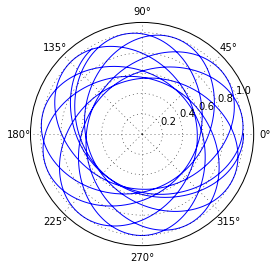

In [296]:
inicio=[1,0,0,-1]
mi_dt=30
ax = plt.subplot(111, polar=True)
t,sol_dt = rk4(q_movP0,inicio,[0,mi_dt],[1.,1.,1.])
ax.plot(sol_dt[:,1],sol_dt[:,0])
show()

## b)
Ahora haremos el caso con friccion:

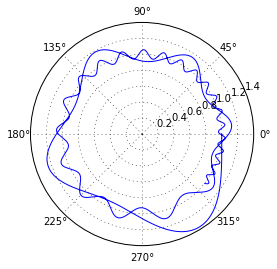

In [314]:
inicio=[1,0,0,-1]
mi_dt=100
ax = plt.subplot(111, polar=True)
u=sqrt(inicio[2]**2 +(inicio[0]*inicio[3])**2)
if u<1:
    
    t,sol_dt = rk4(q_movP1,inicio,[0,mi_dt],[1.,1.,100.])
    ax.plot(sol_dt[:,1],sol_dt[:,0])
else:
    t,sol_dt = rk4(q_movP2,inicio,[0,mi_dt],[1.,1.,100.])
    ax.plot(sol_dt[:,1],sol_dt[:,0])
show()

## 3.a)
Buscamos ver como se mueve una pelota encerrada dentro de una caja de forma extraña, tomando en cuenta la gravedad y sin friccion:

Empezamos determinando las fronteras de la caja.

In [343]:
def techo(L,d,angulo):
    return d+(L/2)*tan(angulo)
def pisoIzq(x,angulo):
    return -tan(angulo)*x
def pisoDer(x,angulo):
    return tan(angulo)*x

In [344]:
def e_mov(r_v,t,fric=0,g=9.8,m=1):
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dx= r_v[2]
    dy=r_v[3]
    if fric==0:
        dvx,dvy = 0,-(g/m)
        #print "No use un modelo de friccion"
    else:
        dvx = -fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m) -fric([r_v[2],r_v[3]])[1]
        #print "use un modelo de friccion"
    return array([dx,dy,dvx,dvy])

In [345]:
def rebote(r_v_i,mi_dt,fric_v,a):
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],fric_v)
    y_med = sol[-1,:]
    n=0
    while abs(y_izq[1]-pisoIzq(y_izq[0],a)) > 1e-4 and abs(y_izq[1]+pisoDer(y_izq[0],a)) > 1e-4:
        n += 1
        if y_med[0]<0:
            if (y_izq[1]-pisoIzq(y_izq[0],a))*(y_med[1]-pisoIzq(y_izq[0],a))< 0.:
            
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            y_izq = reinicio
            y_med = sol[-1,:]
        elif y_med[0]>0:
            if (y_izq[1]+pisoDer(y_izq[0],a))*(y_med[1]+pisoIzq(y_izq[0],a))< 0.:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            y_izq = reinicio
            y_med = sol[-1,:]
    vel_rotx=(y_izq[2]*cos(a)-y_izq[3]*sin(a))
    vel_roty=(-y_izq[2]*sin(a)-y_izq[3]*cos(a))
    y_izq = array([y_izq[0],y_izq[1],vel_rotx,vel_roty])    
    
    
    return y_izq

In [346]:
def pelota(inicio,N,fric_v):  #donde inicio=[x,y,a,v] donde "a" es el ángulo y "v" la magnitud de la velocidad
    x,y,a,v=inicio[0],inicio[1],inicio[2],inicio[3]
    vx=v*cos(a)
    vy=v*sin(a)
    inicio=[x,y,vx,vy]
    trayectoria = zeros((N,len(inicio)))
    mi_dt = .1
    trayectoria[0,:] = array(inicio)
    
    for i in range(N-1):
        t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
        if sol_dt[-1,:][0]<0:
            if sol_dt[-1,:][1]-pisoIzq(sol_dt[-1,:][0],a) < 0:
                punto =rebote(trayectoria[i,:],mi_dt,fric_v,a)
                trayectoria[i+1,:] = punto
            else:
                trayectoria[i+1,:] = sol_dt[-1,:]
        if sol_dt[-1,:][0]>0:
            if sol_dt[-1,:][1]+pisoDer(sol_dt[-1,:][0],a) < 0:
                punto =rebote(trayectoria[i,:],mi_dt,fric_v,a)
                trayectoria[i+1,:] = punto
            else:
                trayectoria[i+1,:] = sol_dt[-1,:]

    return trayectoria

In [ ]:
ai=pi/6.
yi=3./10.*tan(ai)
xi=-(10./3.)
p=pelota([xi,yi,ai,1.],4,0)
print p
#plot (p[:,0],p[:,1],'0')
grid(True)

## 4.c)
Se conserva el momento angular

In [ ]:
for i in range(11):
    d=i*3.1416/6.
    o=oscilador([cos(d),sin(d),0,1],50,a)
p=pelota([0,0,5,5],50,15.,fric_v)
plot (p[:,0],p[:,1],'o')